# Data Visualisation
    Author: Anqi Tang (aka Anthony)
    Description: This file is used to visualise the data
**Table of Graph**
* Tweet Counts
    1. [Tweets per Day](#tweets-per-day)
    2. [Average Tweets per Hour](#average-tweets-per-hour)

### Set up environment

In [1]:
import os
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from IPython.display import display, HTML


## 1. Tweet Counts

In [2]:
# Open the meta.json file
meta_path = '../data/meta.json'
with open(meta_path, 'r') as f:
    meta = json.load(f)
    keys_date = list(meta.keys())
    keys_hour = list(meta[keys_date[0]]['hourly'].keys())


# Retrieve the daily counts
daily_counts = [count['total'] for (date, count) in meta.items()]


# Retrieve the hourly counts
hourly_counts = []
for date, count in meta.items():
    hourly_counts_for_a_day = np.array([count['hourly'][hour] for hour in count['hourly']])
    hourly_counts.append(hourly_counts_for_a_day)

# Calculate the average hourly counts
hourly_counts = np.array(hourly_counts)
average_hourly_counts = hourly_counts.mean(axis=0)  # average over days

### 1.1 Graph - Tweets per Day <a class="anchor" id="tweets-per-day"></a>

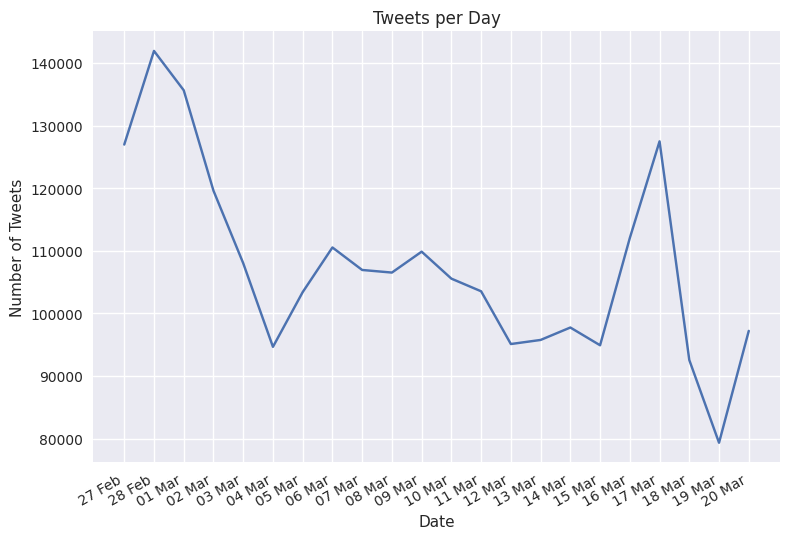

In [3]:
# Format the date strings
dates = [datetime.strptime(date, '%Y-%m-%d').strftime('%d %b') for date in keys_date]

# Create a plot with seaborn style 
plt.style.use('seaborn-v0_8')
plt.plot(dates, daily_counts, linestyle='solid')

# Rotate and align the date labels so they look better
plt.gcf().autofmt_xdate()

# date_format = mpl_dates.DateFormatter('%d %b')  # Format dates as 'Month Day' format
# plt.gca().xaxis.set_major_formatter(date_format)  # Set the date format

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweets per Day')
# plt.ylim(ymin=0, ymax=200000)  # Set y-axis limit

plt.tight_layout() # To avoid overlapping of x-axis labels

plt.show()

### 1.2 Graph - Average Tweets per Hour <a class="anchor" id="average-tweets-per-hour"></a>

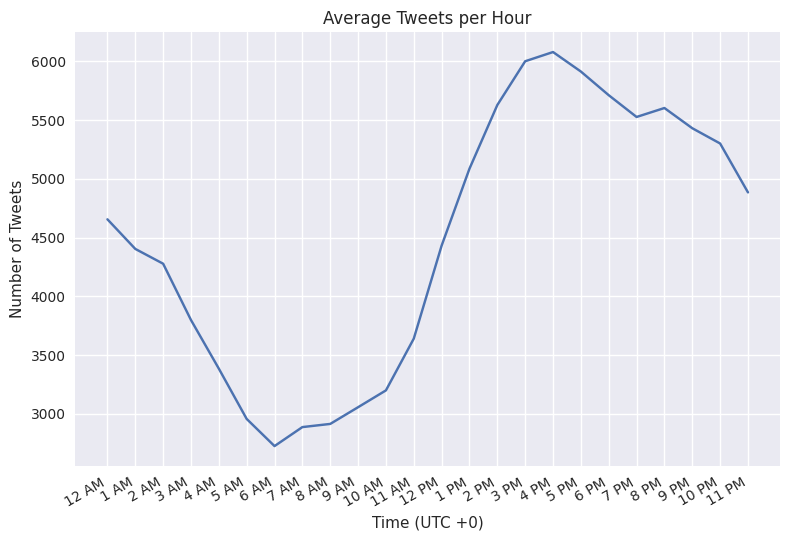

In [4]:
# Format the hours as 'Hour AM/PM' format
hours = [datetime.strptime(hour, '%H:%M:%S').strftime('%I %p').lstrip("0") for hour in keys_hour]

plt.plot(hours, average_hourly_counts, linestyle='solid')

# Rotate and align the date labels so they look better
plt.gcf().autofmt_xdate()

# Set axis labels and title
plt.xlabel('Time (UTC +0)')
plt.ylabel('Number of Tweets')
plt.title('Average Tweets per Hour')

plt.tight_layout() # To avoid overlapping of x-axis labels

plt.show()

## 2. Sentiment

In [8]:
labelled_path = '../data/labelled/'
labelled_file = 'labelled_samples_230227-230308_#577.json'
with open(labelled_path+labelled_file, 'r') as f:
    labelled_data = f.readlines()
    labelled_data = [json.loads(line) for line in labelled_data]

In [13]:
sentiments = [ (line['sentiment']['openai'], line['sentiment']['textblob']) for line in labelled_data]

openai_sentiments, textblob_sentiments = zip(*sentiments)
    

In [32]:
openai_sentiments = np.array(openai_sentiments)
textblob_sentiments = np.array(textblob_sentiments)

difference = openai_sentiments != textblob_sentiments
# np.count_nonzero(openai_sentiments == textblob_sentiments)
# for i, differ in enumerate(difference):
#     if differ and np.absolute(openai_sentiments[i] - textblob_sentiments[i]) == 2:


agreement = np.count_nonzero(np.abs(openai_sentiments - textblob_sentiments) == 0)
similarity = np.count_nonzero(np.abs(openai_sentiments - textblob_sentiments) == 1)
disagreement = np.count_nonzero(np.abs(openai_sentiments - textblob_sentiments) == 2)